In [98]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def my_style(title='', xtitle='', ytitle='', gridstyle=':'):
    plt.grid(linestyle=gridstyle)
    plt.title(title)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    
%matplotlib inline
import matplotlib
from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='talk', ticks=True, grid=True, gridlines='--', figsize=(13, 9), fscale=2)
jtplot.style(theme='grade3', context='paper', ticks=True, grid=True, gridlines='--', figsize=(13, 9), fscale=2)
matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans', 'sans-serif']

# Посмотреть файлы с сечениями к моделированию

In [2]:
file_new = pd.read_csv('/store17/petrov/mc_edited/Cmd3Sim/data/cs_klks_nikitap', sep=' ', header=None, index_col=0)
file_old = pd.read_csv('/store17/petrov/mc_edited/Cmd3Sim/data/cs_klks_cmd2', sep=' ', header=None, index_col=0)

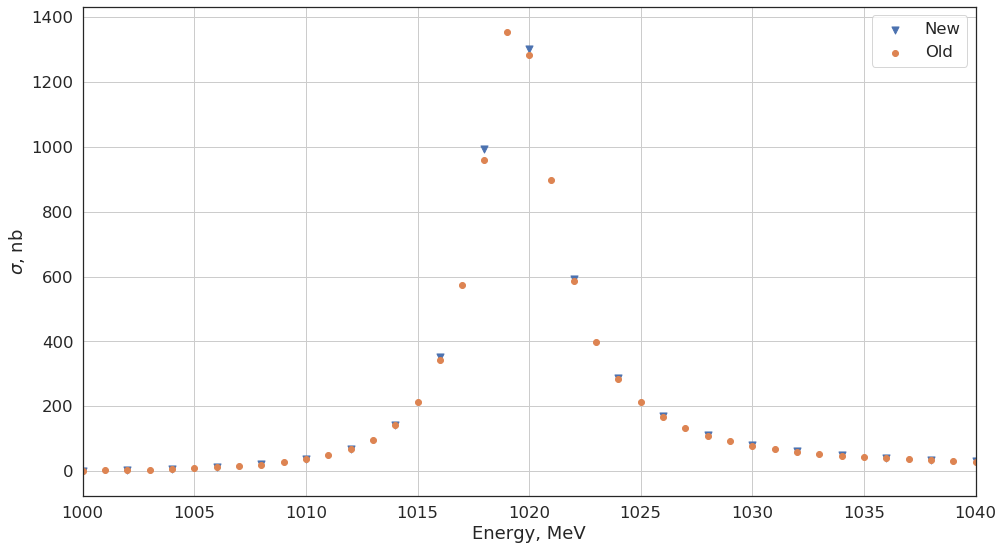

In [16]:
plt.scatter(x=file_new[1], y=file_new[2], label='New', marker='v', s=50)
plt.scatter(x=file_old[1], y=file_old[2], label='Old')
plt.grid()
plt.ylabel('$\\sigma$, nb')
plt.xlabel('Energy, MeV')
plt.xlim(1000, 1040)
plt.legend(frameon=True);

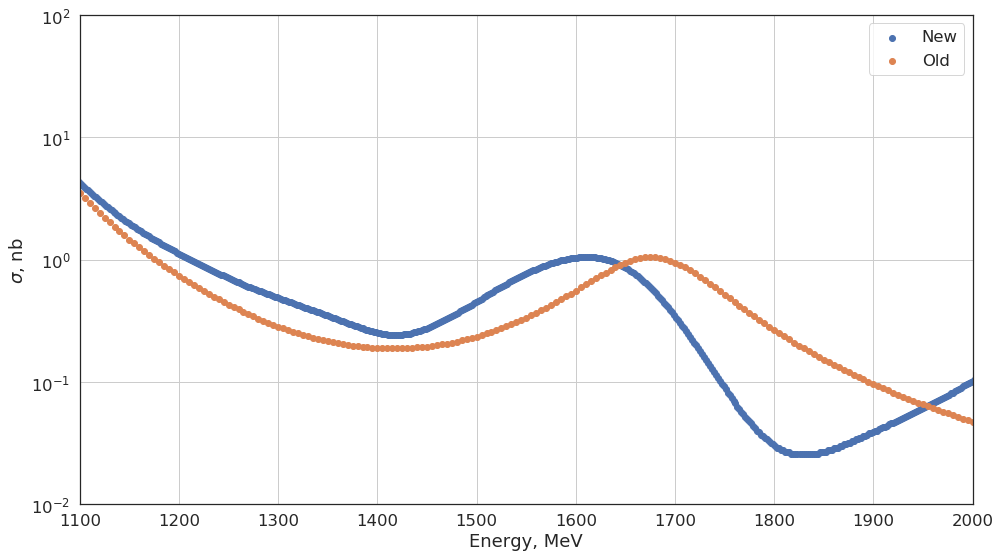

In [14]:
plt.scatter(x=file_new[1], y=file_new[2], label='New')
plt.scatter(x=file_old[1], y=file_old[2], label='Old')
plt.grid()
plt.ylabel('$\\sigma$, nb')
plt.xlabel('Energy, MeV')
plt.xlim(1100, 2000)
plt.ylim(0.01, 100)
plt.yscale('log')
plt.legend(frameon=True)

Теперь основная часть

In [25]:
energy = 550
entrystop = None#1e5

In [33]:
f = uproot.open(f'root://cmd//scan2011/scan2011_tr_ph_fc_e{energy}_v6.root')

In [34]:
#Сравниваю два файла моделирования
f1 = uproot.open('/store17/petrov/data/kskl_sim_custom/tr_ph/tr_ph_kskl_1.5.root') #custom mc
f2 = uproot.open('/store17/lukinp/Analysis/klks_high/sim/tr_ph/tr_ph_750.root') #old mc
f3 = uproot.open('/store17/petrov/data/kskl_sim/tr_ph_run004898.root') #old mc v7

# Работа с блоком треков

In [35]:
pmin_cut = 40
pmax_cut = 1.1*energy
z_cut = 10
theta_cut = 0.6
theta2_cut = np.pi - theta_cut
hit_cut = 6
chi2r_cut = 30
chi2z_cut = 25
rho_cut = 0.1

In [36]:
import concurrent.futures
executor = concurrent.futures.ThreadPoolExecutor()

In [37]:
def get_table(file):
    return file['tr_ph'].pandas.df(branches=['tptot', 'nt', 'tdedx', 'tz', 'tth', 'tphi', 'tnhit', \
                                          'tchi2r', 'tchi2z', 'trho', 'emeas'], executor=executor, entrystop=entrystop)

In [38]:
%time df = [get_table(f), get_table(f1)]

CPU times: user 59.7 s, sys: 41.8 s, total: 1min 41s
Wall time: 8min 6s


In [39]:
print( df[0].emeas.value_counts(), df[1].emeas.value_counts(), sep='\n' )

548.440002    6957153
Name: emeas, dtype: int64
750.0    26312
Name: emeas, dtype: int64


In [40]:
df2 = [ d.query('nt>=2') for d in df] #условие на количество треков

In [41]:
df2[0].head(20)

tptot  nt         tdedx         tz       tth      tphi  \
entry subentry                                                                
4     0         204.888214   2   2187.155029  14.373367  2.319036  1.948179   
      1         582.794312   2   5820.021973  12.629278  2.681592  3.435451   
6     0         192.970322   3  22601.646484  23.992844  2.109869  3.001816   
      1         297.422577   3   9752.906250  23.907066  2.182017  3.413409   
      2          41.951012   3   2635.555664  26.634527  2.637315  3.989508   
11    0          78.135086   2   3374.600098  20.451509  2.162485  0.044117   
      1         152.887955   2   2824.125488  20.284803  2.173454  0.073026   
12    0         261.017883   3  11817.102539  -7.470940  1.664238  5.717640   
      1         234.118912   3  13296.453125  -7.591343  1.605335  3.246814   
      2         155.594437   3   3315.229248  -6.877184  1.430103  4.825445   
13    0          51.139191   2   2518.208984  18.812489  2.070622  0.498920   
      1          30.675777   2   2638.059814  20.125046  2.617332  0.137028   
14    0         487.624023   2   2711.328613   0.626972  2.022096  1.233322   
      1         456.602386   2   2789.822998   0.701276  1.481172  4.396793   
16    0         359.442474   2  10220.554688  -4.325649  1.843783  3.033135   
      1         273.889038   2  13147.716797  -5.023930  1.811997  3.281653   
18    0          94.285423   2   2691.502686  21.646610  2.430613  4.932212   
      1          68.606445   2    958.767029  -4.737610  0.531147  2.908790   
19    0          78.984123   2   2511.755371  20.332880  2.438485  5.904354   
      1          72.571693   2   3482.381104  19.754087  2.434939  5.801138   

                tnhit    tchi2r    tchi2z      trho       emeas  
entry subentry                                                   
4     0            20  0.372969  1.343584 -1.417129  548.440002  
      1             7  0.874833  0.544193  1.262637  548.440002  
6     0            14  2.603662  2.566786  1.411791  548.440002  
      1            15  0.524889  2.564502  0.824714  548.440002  
      2            13  1.933745  2.366601 -0.821852  548.440002  
11    0             9  1.240692  1.452669  2.167984  548.440002  
      1            14  0.489679  0.806550  1.969951  548.440002  
12    0            18  0.423340  0.770226  2.064734  548.440002  
      1            20  2.588436  0.820059 -2.146957  548.440002  
      2            17  0.964759  0.761973  0.501902  548.440002  
13    0            19  1.078564  0.928614  0.804925  548.440002  
      1            14  0.516812  1.581519  1.267308  548.440002  
14    0            20  0.793484  0.955059 -0.006397  548.440002  
      1            18  1.394036  0.573752  0.004725  548.440002  
16    0            11  3.895293  0.339638  0.212590  548.440002  
      1             7  0.671959  2.569692 -0.403512  548.440002  
18    0             8  0.704132  1.589807 -0.839761  548.440002  
      1             5  2.253333  1.385108  4.416845  548.440002  
19    0            13  1.980717  1.932791  0.556632  548.440002  
      1            10  0.906504  2.455166  1.601094  548.440002

In [42]:
df2 = [ d.query('tptot>@pmin_cut&\
tptot<@pmax_cut&\
abs(tz)<@z_cut&\
tchi2r<@chi2r_cut&\
tchi2z<@chi2z_cut&\
tth>@theta_cut&tth<@theta2_cut&\
tnhit>@hit_cut&\
abs(trho)>@rho_cut') for d in df2 ]

In [43]:
df2[0].shape

(525090, 11)

In [44]:
drop_entries = [ d.groupby('entry').agg({'tz':'count'}).query('tz!=2').index for d in df2]

In [45]:
df3 = [ d.drop(index=de, level=0) for d,de in zip(df2,drop_entries) ]

In [46]:
df3[0].shape

(274518, 11)

In [47]:
df6 = [ d.query('tdedx<16000') for d in df3 ]

In [48]:
def piDeDx(P):
    return 5.58030e+9 / np.power(P + 40., 3) + 2.21228e+3 - 3.77103e-1 * P;
xpions = np.linspace(40, pmax_cut, 200)
ypions_max = piDeDx(xpions) + 2000
ypions_min = piDeDx(xpions) - 2000

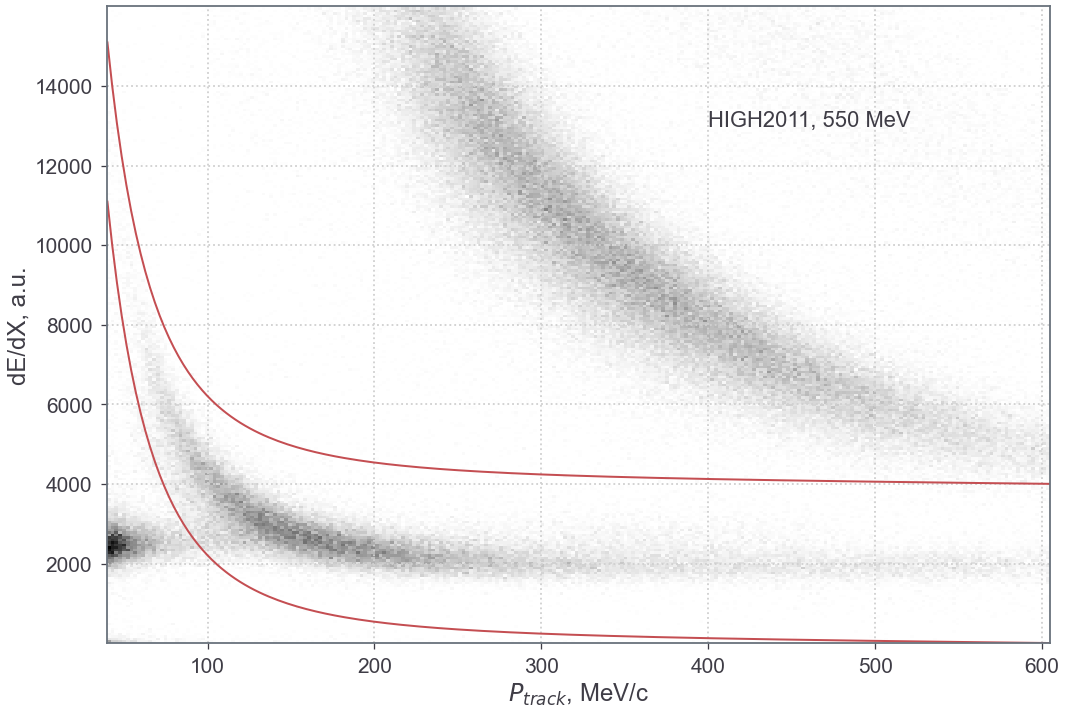

In [61]:
plt.hist2d(df6[0].tptot, df6[0].tdedx, bins=(250, 250), cmap='binary');#cmap=plt.cm.cubehelix);
# plt.colorbar()
plt.plot(xpions,ypions_max, color='r', linewidth=2);
plt.plot(xpions,ypions_min, color='r', linewidth=2);
plt.text(400, 13000, f'HIGH2011, {energy} MeV')
my_style('','$P_{track}$, MeV/c', 'dE/dX, a.u.')
# plt.savefig('Journal/outputs/images/beginning_dedx.png', dpi=200)

In [62]:
df4 = [ d.assign(dedx_cut=piDeDx(d['tptot'])-d['tdedx']).query( 'abs( dedx_cut ) < 2000' ) for d in df3]

In [63]:
drop_events = [ d.groupby('entry').agg({'tz':'count'}).query('tz!=2').index for d in df4]

In [64]:
df4 = [ d.drop(index=de, level=0) for d,de in zip(df4, drop_events) ]

In [65]:
df4[0].shape

(26072, 12)

In [66]:
df4[0].head()

tptot  nt        tdedx        tz       tth      tphi  \
entry subentry                                                              
603   0         287.691101   2  1526.790894  1.882253  1.186137  1.270954   
      1         280.027039   2  1751.671875  2.526443  1.944651  4.404423   
1410  0         269.108276   2  1682.938843  9.225901  1.509798  5.644919   
      1         271.948822   2  1551.126709  9.827279  1.486917  2.515109   
2132  0         357.703003   2  1688.818970 -6.454446  1.422176  4.074175   

                tnhit    tchi2r    tchi2z      trho       emeas    dedx_cut  
entry subentry                                                               
603   0            20  2.035845  0.921813 -1.222578  548.440002  735.585476  
      1            18  0.854437  0.596934  1.197415  548.440002  525.263169  
1410  0            17  1.414032  0.766444 -0.898332  548.440002  616.800374  
      1            20  1.674798  0.630867  0.956738  548.440002  742.426812  
2132  0            18  1.632294  0.560557  1.126775  548.440002  477.281862

Рассмотрим возможность ката на средний импульс пионов

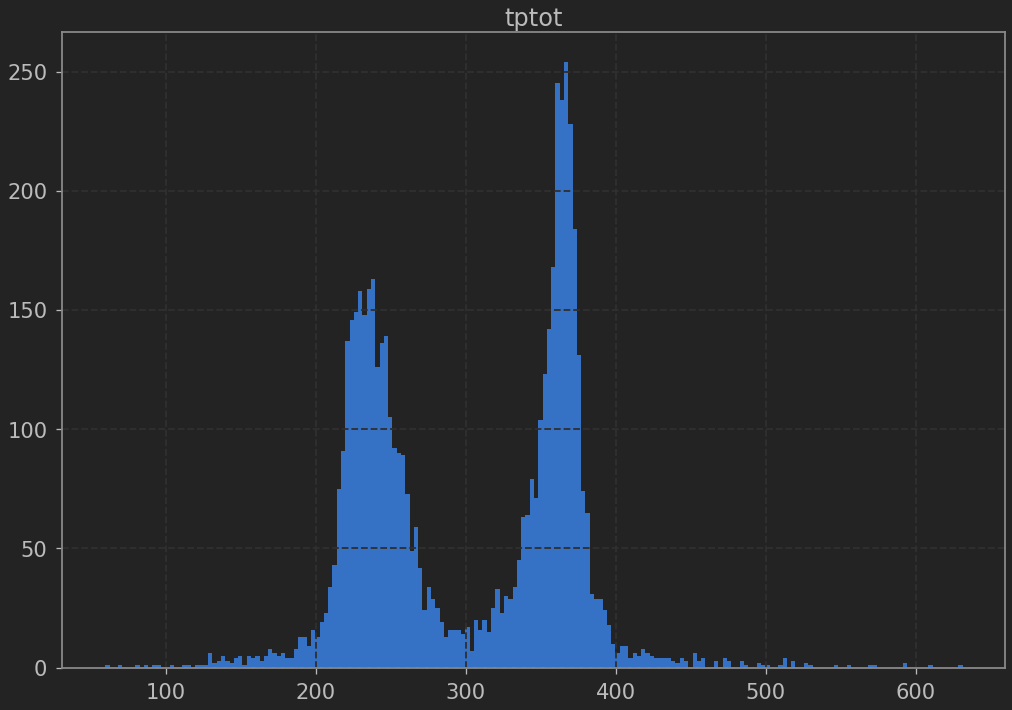

In [31]:
df4[0].groupby('entry').agg({'tptot':'mean'}).hist(bins=200);

## Теперь работа с блоком KS

In [67]:
align_cut = 0.8
p_cut =  2 * (0.0869 * energy - 36.53)
print(f'Align cut: {align_cut}')
print(f'Momentum cut: {p_cut:.2f} MeV')

Align cut: 0.8
Momentum cut: 22.53 MeV


In [68]:
def get_table_ks(file):
    return file['tr_ph'].pandas.df(branches=['nks', 'kstype', 'ksalign', 'ksminv', 'ksvind', \
                                            'ksptot', 'ksth', 'ksphi'], executor=executor, entrystop=entrystop)

In [69]:
%time dfks = [get_table_ks(f), get_table_ks(f2)]

CPU times: user 28.2 s, sys: 17 s, total: 45.2 s
Wall time: 3min 50s


In [70]:
ksvind_drops = [f'ksvind[{i}]' for i in range(2,20)]
[ d.drop(ksvind_drops, axis=1, inplace=True) for d in dfks];

In [71]:
dfks[0].shape

(112125, 9)

In [72]:
[ d.query('kstype==0', inplace=True) for d in dfks];

In [73]:
index_merge = [ dks.index.droplevel(1) & d.index.droplevel(1) for dks,d in zip(dfks, df4) ]
#оставить только entry, потому что subentry в таблицах означают разные вещи
dfks = [ d.loc[ind, ] for d,ind in zip(dfks,index_merge) ]

### Оставить только лучшие KS в каждом событии

In [74]:
dfks = [ d.assign(difmass = np.abs(d['ksminv'] - 497.6) ) for d in dfks ]
min_difmasses = [ d.groupby('entry').agg({'difmass':np.min}) for d in dfks ]
dfks2 = [pd.merge(md, d, on=['difmass', 'entry']).drop(['difmass'], axis=1) for md, d in zip(min_difmasses, dfks)]

In [75]:
dfks2[0].head()

,nks,kstype,ksalign,ksminv,ksvind[0],ksvind[1],ksptot,ksth,ksphi
entry,,,,,,,,,
3447,1,0,0.998086,495.105347,0,1,129.369904,1.435132,3.759992
13868,1,0,0.973685,465.068756,0,1,46.957989,2.803366,3.419373
19405,1,0,0.999986,498.271454,0,1,235.724762,1.281618,4.431725
21748,1,0,0.996494,496.308685,0,1,114.675224,1.331427,3.849195
22426,1,0,0.937878,479.263947,0,2,40.484215,2.970952,1.728773


In [76]:
dfks2[0].shape

(1614, 9)

### Разница между исправленными углами и начальными

In [77]:
dfks2[0].head()

,nks,kstype,ksalign,ksminv,ksvind[0],ksvind[1],ksptot,ksth,ksphi
entry,,,,,,,,,
3447,1,0,0.998086,495.105347,0,1,129.369904,1.435132,3.759992
13868,1,0,0.973685,465.068756,0,1,46.957989,2.803366,3.419373
19405,1,0,0.999986,498.271454,0,1,235.724762,1.281618,4.431725
21748,1,0,0.996494,496.308685,0,1,114.675224,1.331427,3.849195
22426,1,0,0.937878,479.263947,0,2,40.484215,2.970952,1.728773


In [78]:
df_ang = [ d.loc[dks.index,].copy() for d, dks in zip(df4, dfks2)]
df_ang = [ d.assign(px = d.tptot*np.sin(d.tth)*np.cos(d.tphi),\
              py = d.tptot*np.sin(d.tth)*np.sin(d.tphi),\
              pz = d.tptot*np.cos(d.tth)) for d in df_ang]

In [79]:
df_ang = [ d[['px','py','pz']].groupby('entry').agg('sum') for d in df_ang]
df_ang = [ d.assign(ptot = lambda x: np.sqrt( x.px**2 + x.py**2 + x.pz**2 ),\
              th = lambda x: np.arctan2(np.sqrt( x.px**2 + x.py**2 ), x.pz), \
              phi = np.arctan2(d.py, d.px) ).drop(['px','py','pz'], axis=1) for d in df_ang]

In [80]:
df_ang = [ pd.merge(d, dks[['ksptot', 'ksth', 'ksphi']], on='entry') for d, dks in zip(df_ang, dfks2)]

In [81]:
for d in df_ang:
    d['ksphi'] = d.ksphi.where(d.ksphi<np.pi, d.ksphi-2*np.pi)

In [82]:
df_ang[0].shape

(1614, 6)

In [83]:
df_ang[0].head()

,ptot,th,phi,ksptot,ksth,ksphi
entry,,,,,,
3447,129.700607,1.442144,-2.521183,129.369904,1.435132,-2.523194
13868,51.933510,2.825860,-2.849290,46.957989,2.803366,-2.863812
19405,235.103348,1.293879,-1.866303,235.724762,1.281618,-1.851460
21748,115.501373,1.336509,-2.443990,114.675224,1.331427,-2.433990
22426,39.852032,2.963078,1.751825,40.484215,2.970952,1.728773


/store17/petrov/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/store17/petrov/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


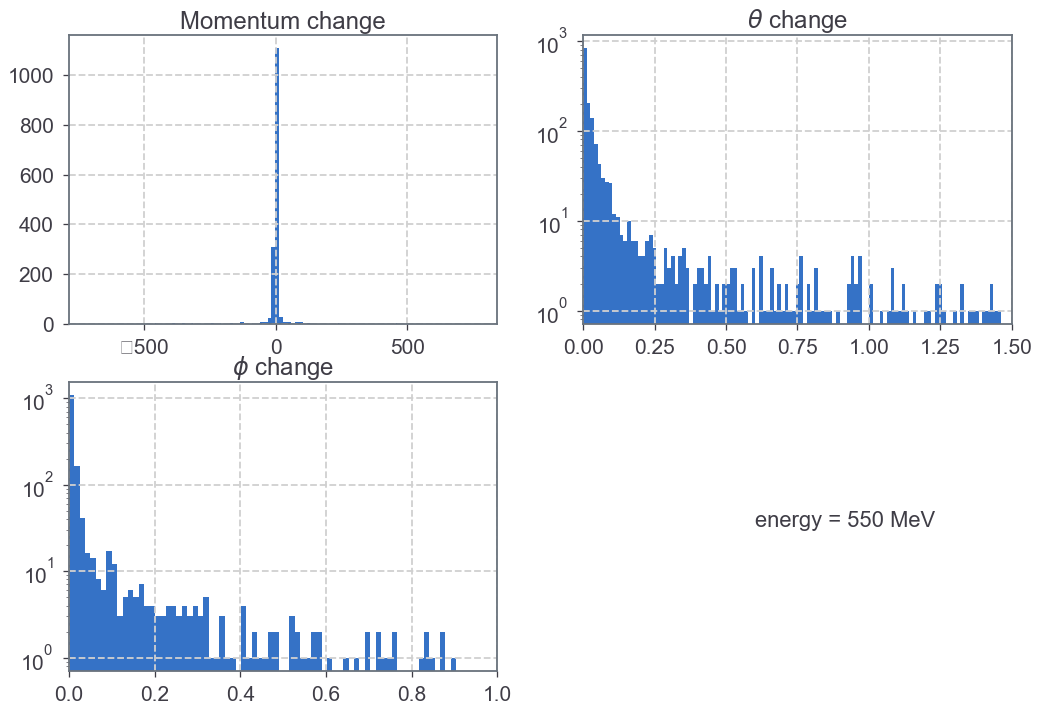

In [84]:
fig = plt.figure()
plt.subplot(2,2,1)
plt.hist(df_ang[0].ptot - df_ang[0].ksptot, bins=100);
plt.title('Momentum change');
plt.subplot(2,2,2)
plt.hist(np.abs(df_ang[0].th - df_ang[0].ksth), bins=200);
plt.xlim(0,1.5)
plt.yscale('log')
plt.title('$\\theta$ change');
plt.subplot(2,2,3)
plt.hist(np.abs(df_ang[0].phi - df_ang[0].ksphi), bins=500);
plt.xlim(0, 1)
plt.yscale('log')
plt.title('$\\phi$ change');
plt.subplot(2,2,4)
plt.axis('off')
plt.text(0.4, 0.5, f'energy = {energy} MeV');

### Кат по $\alpha$

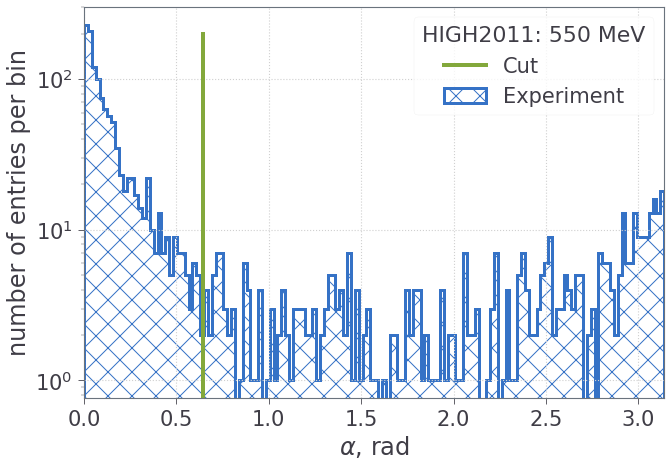

In [100]:
plt.hist(np.arccos(dfks2[0].ksalign), bins=150, hatch='x', histtype='step', lw=3, label='Experiment');
yy = [0, 2*10e1]
xx = np.arccos( np.ones(2)*align_cut )
plt.plot(xx, yy, lw=4, label='Cut')
plt.grid(ls='--')
plt.xlim(0, np.pi)
plt.legend(title=f'HIGH2011: {energy} MeV')
plt.yscale('log')
my_style('','$\\alpha$, rad', 'number of entries per bin')
# plt.savefig('Journal/outputs/images/beginning_alpha.png')

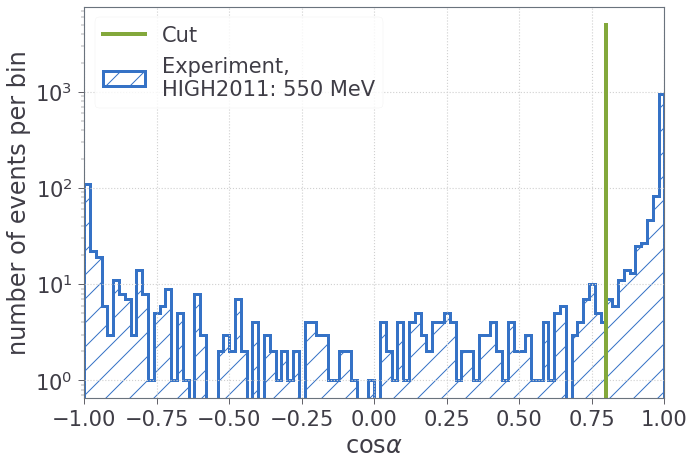

In [102]:
plt.hist(dfks2[0].ksalign, bins=100, histtype='step', lw=3, hatch='/', alpha=1, label=f'Experiment,\nHIGH2011: {energy} MeV');
# plt.hist(dfks2[1].ksalign, bins=100, histtype='step', lw=3, hatch='\\', alpha=0.4, label='MC');
yy = [0, 5*10e2]
xx = np.ones(2)*align_cut
plt.plot(xx, yy, lw=4, label='Cut')
plt.grid(ls='--')
plt.xlim(-1, 1)
plt.yscale('log')
plt.legend()
my_style('','$\cos{\\alpha}$','number of events per bin')
# plt.savefig('Journal/outputs/images/beginning_cosa.pdf')

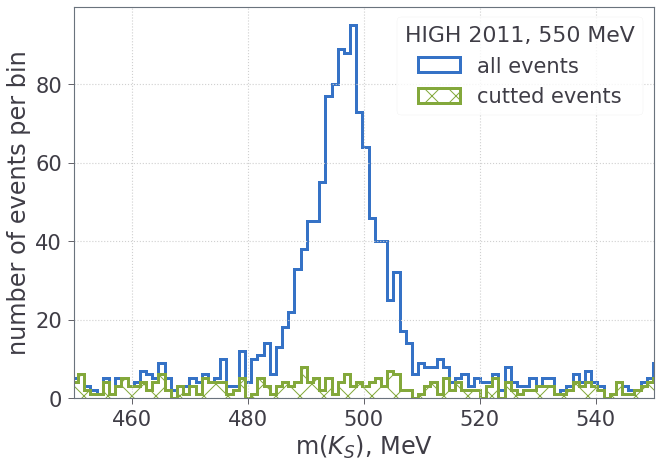

In [103]:
plt.hist( dfks[0].ksminv, bins=150, label='all events', histtype='step', lw=3 );
plt.hist( dfks[0][dfks[0]['ksalign']<align_cut].ksminv, bins=150, label='cutted events', histtype='step',hatch='x', lw=3 );
plt.grid(ls=':');
plt.legend(title=f'HIGH 2011, {energy} MeV', frameon=True);
plt.xlim(450, 550);
plt.xlabel('m($K_S$), MeV');
plt.ylabel('number of events per bin');
# plt.savefig('Journal/outputs/images/beginning_cosa_invmass.pdf')

In [107]:
mom = uproot.open('/spoolA/petrov/research/outputs/19/trees/800.00_76450.root')['pic_mom'].pandas.df().query('align>0.8')

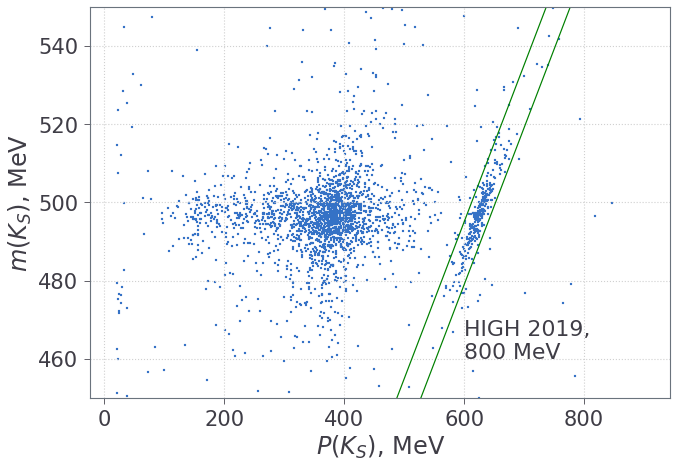

In [156]:
m1 = mom.query('passed&abs(mass-500)<50')
m2 = mom.query('not(passed)&abs(mass-500)<50')
xi = 0.21/(1.6 - 0.73) + 0.14
xx = np.array([450, 550])
p0 = np.sqrt( 800**2 - 497.6**2 ) 
yy = (p0 + (xx - 497.6)/np.tan(xi) )
plt.scatter(mom.momentum, mom.mass, s=5, marker='s')
# plt.hist2d(mom.momentum, mom.mass, bins=250, cmap='gist_yarg')
plt.text(600, 460, 'HIGH 2019,\n800 MeV')
# plt.legend(title='HIGH 2011,\n800 MeV')
plt.plot(yy-20, xx, c='green')
plt.plot(yy+20, xx, c='green')
plt.ylim(450, 550)
my_style('','$P(K_S)$, MeV', '$m(K_S)$, MeV')
# plt.savefig('Journal/outputs/images/mvsp.pdf')

In [47]:
dfks3 = [ d.query('ksalign>@align_cut') for d in dfks2]

In [48]:
dfks3[0].shape

(4590, 9)

### Кат по импульсу

In [49]:
p_ideal = np.sqrt(energy**2 - 497.6**2)
dfks4 = [ d.query('abs(ksptot - @p_ideal)<@p_cut') for d in dfks3]

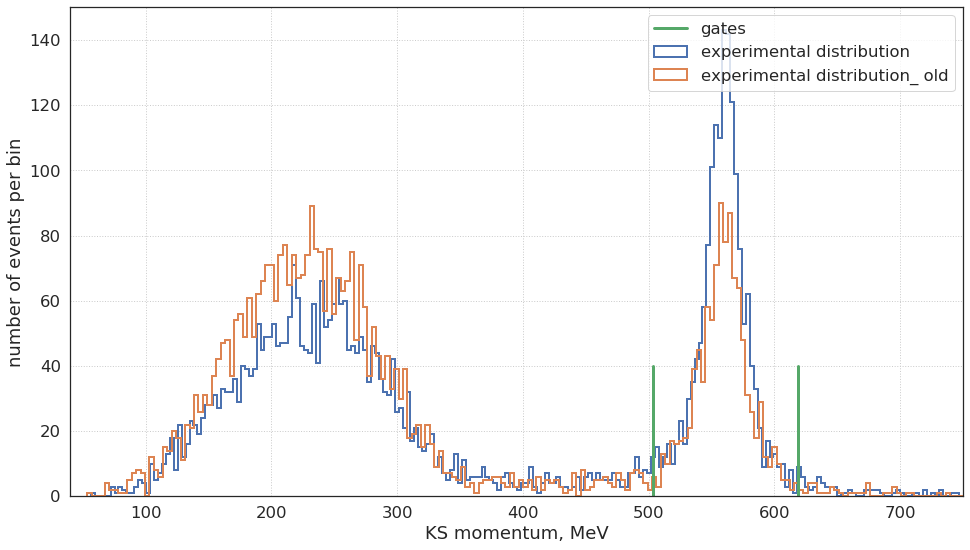

In [50]:
plt.hist(dfks3[0].ksptot, bins=220, histtype='step', lw=2, label='experimental distribution');
plt.hist(dfks3[1].ksptot, bins=220, histtype='step', lw=2, label='experimental distribution_ old');
xx = np.ones(2)*p_ideal
yy = np.linspace(0, 40, 2)
plt.plot(xx-p_cut, yy, c='g', lw=3, label='gates')
plt.plot(xx+p_cut, yy, c='g', lw=3)
plt.xlim(pmin_cut, energy);
plt.grid(ls=':');
plt.legend(frameon=True);
plt.xlabel('KS momentum, MeV');
plt.ylabel('number of events per bin');

In [51]:
dfks4[0].head()

,nks,kstype,ksalign,ksminv,ksvind[0],ksvind[1],ksptot,ksth,ksphi
entry,,,,,,,,,
18,1,0,0.974665,518.642273,0,1,618.302063,2.037943,3.891665
23,1,0,0.995576,445.000244,0,1,580.423218,1.275376,2.889709
24,1,0,0.999972,496.352020,0,1,563.272400,1.692486,1.235848
41,1,0,0.999927,500.651520,0,1,557.944763,2.080942,2.384397
51,1,0,0.999996,496.122192,0,1,560.477600,1.835418,0.136228


In [52]:
dfks4[0].shape

(1610, 9)

# Объединить результат из блока KS и треков

In [53]:
df5 = [ pd.DataFrame( d.to_records() ).set_index('entry') for d in df4] #превратить subentry в обычный столбец
df5 = [ d.groupby('entry').agg(ksvind_0 = ('subentry', 'min'),
                         ksvind_1 = ('subentry','max') ) for d in df5]

In [54]:
dfks4 = [ d.rename({'ksvind[0]':'ksvind_0', 'ksvind[1]':'ksvind_1'}, axis=1) for d in dfks4 ]

In [55]:
df5[0].head()

,ksvind_0,ksvind_1
entry,,
3,0,1
9,0,1
10,0,1
13,0,1
14,0,1


In [56]:
dfks4[0].head()

,nks,kstype,ksalign,ksminv,ksvind_0,ksvind_1,ksptot,ksth,ksphi
entry,,,,,,,,,
18,1,0,0.974665,518.642273,0,1,618.302063,2.037943,3.891665
23,1,0,0.995576,445.000244,0,1,580.423218,1.275376,2.889709
24,1,0,0.999972,496.352020,0,1,563.272400,1.692486,1.235848
41,1,0,0.999927,500.651520,0,1,557.944763,2.080942,2.384397
51,1,0,0.999996,496.122192,0,1,560.477600,1.835418,0.136228


In [57]:
(dfks4[0].ksvind_0 > dfks4[0].ksvind_1).sum() #проверка, что в нулевом всегда меньшее значение чем в первом

0

In [58]:
dfks4[0].shape

(1610, 9)

In [59]:
result = [ pd.merge(d, dks, on=['entry', 'ksvind_0', 'ksvind_1']) for d, dks in zip(df5, dfks4) ]

In [60]:
result[0].head()

,ksvind_0,ksvind_1,nks,kstype,ksalign,ksminv,ksptot,ksth,ksphi
entry,,,,,,,,,
18,0,1,1,0,0.974665,518.642273,618.302063,2.037943,3.891665
23,0,1,1,0,0.995576,445.000244,580.423218,1.275376,2.889709
24,0,1,1,0,0.999972,496.352020,563.272400,1.692486,1.235848
41,0,1,1,0,0.999927,500.651520,557.944763,2.080942,2.384397
51,0,1,1,0,0.999996,496.122192,560.477600,1.835418,0.136228


In [61]:
result[0].shape

(1597, 9)

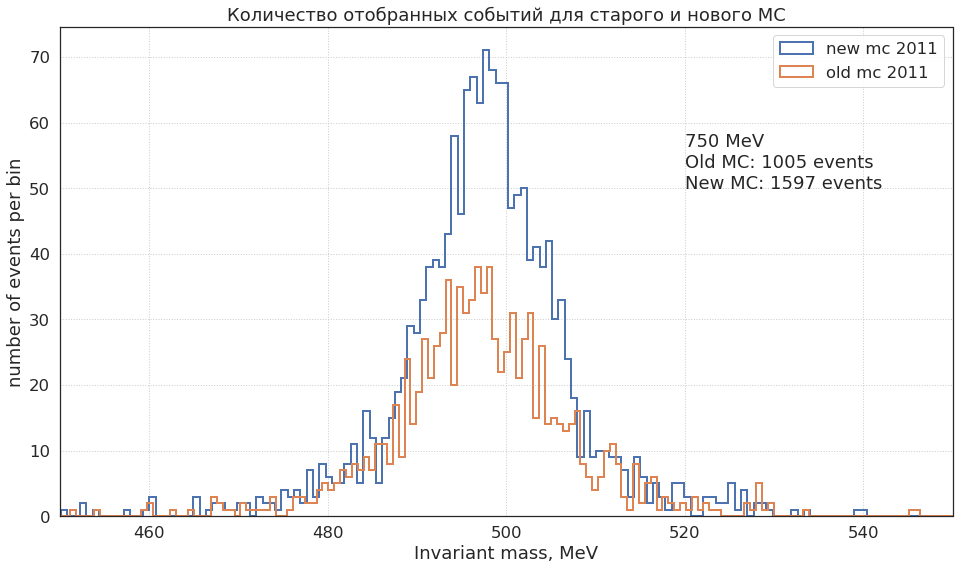

In [62]:
plt.hist(result[0].ksminv, histtype='step', bins=200, lw=2, label='new mc 2011');
plt.hist(result[1].ksminv, histtype='step', bins=200, lw=2, label='old mc 2011');
plt.grid(ls=":")
plt.xlim(450, 550);
plt.xlabel('Invariant mass, MeV');
plt.ylabel('number of events per bin');
plt.legend(frameon=True);
plt.text(520, 50, f'{energy} MeV\nOld MC: {result[1].shape[0]} events\nNew MC: {result[0].shape[0]} events')
plt.title('Количество отобранных событий для старого и нового MC');